# Decision Tree

Title - Movie Recommendation Engine
Group no - 89
Group Members  - Sathsarani H.A.D.  - EG/2020/4343
                 Thennakoon G.H.M.  - EG/2020/4346

In [1]:
import pandas as pd

In [2]:
#import movies dataset
movies = pd.read_csv('movies.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#no of rows and columns
movies.shape

(9742, 3)

In [5]:
#import ratings dataset
ratings = pd.read_csv('ratings.csv')

ratings.shape

(100836, 4)

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
#The new column 'year' is created by extracting the year from the column 'title', using the str.extract() function.
#the regular expression 'r'\((\d{4})\' specifies:
# \d{4}: 4 digits
# (\d{4}): capture 4 digits
# \((\d{4})\: Capture 4 digits inside parentheses in text

movies['year']=movies['title'].str.extract(r'\((\d{4})\)')

In [8]:
#Converts the 'year' column to a numeric value. Values that are not are transformed into 'NaN'.

movies['year']=pd.to_numeric(movies['year'], errors='coerce')

#A range of years is established, converting those that fall outside this range into 'NaN'.

import numpy as np
movies.loc[(movies['year'] < 1900) | (movies['year'] > 2023), 'year']=np.nan

#The number of films that do not contain information about the year is added.

missing_year_count=movies['year'].isna().sum()

In [9]:
#Rows whose movies do not contain year information are displayed.

missing_year_rows=movies[movies['year'].isna()]
print(missing_year_rows)

      movieId                                              title  \
6059    40697                                          Babylon 5   
9031   140956                                   Ready Player One   
9091   143410                                         Hyena Road   
9138   147250  The Adventures of Sherlock Holmes and Doctor W...   
9179   149334                                  Nocturnal Animals   
9259   156605                                           Paterson   
9367   162414                                          Moonlight   
9448   167570                                             The OA   
9514   171495                                             Cosmos   
9515   171631                            Maria Bamford: Old Baby   
9518   171749                  Death Note: Desu nôto (2006–2007)   
9525   171891                                  Generation Iron 2   
9611   176601                                       Black Mirror   

                      genres  year  
6059      

In [10]:
#We are left with only the first gender in the 'genres' column

movies['first_genre']=movies['genres'].str.split('|').str[0]
print(movies['first_genre'])

0       Adventure
1       Adventure
2          Comedy
3          Comedy
4          Comedy
          ...    
9737       Action
9738    Animation
9739        Drama
9740       Action
9741       Comedy
Name: first_genre, Length: 9742, dtype: object


In [11]:
movies.head()

,movieId,title,genres,year,first_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Adventure
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,Comedy
4,5,Father of the Bride Part II (1995),Comedy,1995.0,Comedy


In [12]:
#The average score per movie from the 'ratings' dataset is calculated

avg_ratings=ratings.groupby('movieId')['rating'].mean().reset_index()

#Rename 'rating' column to 'avg_ratings' for clarity

avg_ratings=avg_ratings.rename(columns={'rating': 'avg_ratings'})


#Rounded to 2 decimal places

avg_ratings=round(avg_ratings,2)


In [13]:
#Merge the 'movie' and "avg_ratings" dataframes using the 'movieId' column

movie=pd.merge(movies, avg_ratings, on='movieId', how='left')
print(movie)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres    year first_genre  \
0     Adventure|Animation|Children|Comedy|Fantasy  1995.0   Adventure   
1                      Adventure|Children|Fantasy  1995.0   Adventure   
2                                  Comedy|Romance  1995.0   

In [14]:
#Films without rating

no_ratings=movie['avg_ratings'].isnull().sum()
print(no_ratings)

18


In [15]:
#They are assigned a value of 0

no_ratings=movie['avg_ratings'].fillna(0)
print(movie)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres    year first_genre  \
0     Adventure|Animation|Children|Comedy|Fantasy  1995.0   Adventure   
1                      Adventure|Children|Fantasy  1995.0   Adventure   
2                                  Comedy|Romance  1995.0   

In [16]:
#The number of ratings that each movie has is calculated.

count_ratings=ratings.groupby('movieId')['rating'].count().reset_index()

In [17]:
#Rename 'rating' column to 'count_ratings' for clarity
count_ratings=count_ratings.rename(columns={'rating': 'count_ratings'})
print(count_ratings)

      movieId  count_ratings
0           1            215
1           2            110
2           3             52
3           4              7
4           5             49
...       ...            ...
9719   193581              1
9720   193583              1
9721   193585              1
9722   193587              1
9723   193609              1

[9724 rows x 2 columns]


In [18]:
#Merge 'movie' and "count_ratings" dataframes using 'movieId' column

movie=pd.merge(movie, count_ratings, on='movieId', how='left')
print(movie)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres    year first_genre  \
0     Adventure|Animation|Children|Comedy|Fantasy  1995.0   Adventure   
1                      Adventure|Children|Fantasy  1995.0   Adventure   
2                                  Comedy|Romance  1995.0   

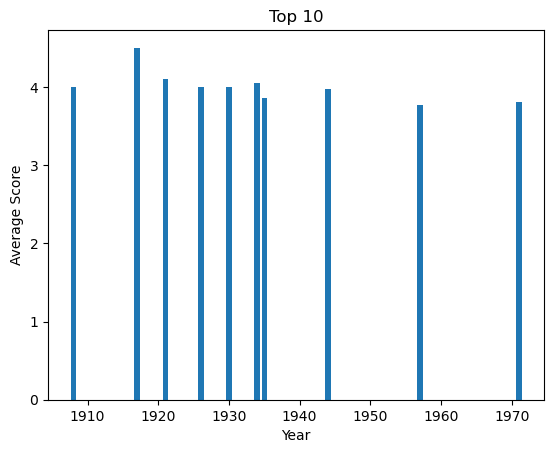

In [19]:
import matplotlib.pyplot as plt

#The average score is calculated per year

mean_ratings_by_year=movie.groupby('year')['avg_ratings'].mean().reset_index()


#It is ordered from largest to smallest

mean_ratings_by_year=mean_ratings_by_year.sort_values(by='avg_ratings', ascending=False)


#The top10 is calculated

top10_ratings=mean_ratings_by_year.head(10)


#The barplot is plotted

plt.bar(top10_ratings['year'], top10_ratings['avg_ratings'])
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Top 10')
plt.show()


In [21]:
#The average score is calculated by gender.
mean_by_genres=movie.groupby('first_genre')['avg_ratings'].mean()

#The genre with the highest average score is obtained
max_genres=mean_by_genres.idxmax()
print(max_genres)


Film-Noir


In [22]:
#and the one with the lowest average score
min_genres=mean_by_genres.idxmin()
print(min_genres)

Horror


In [23]:
#The movie with the highest number of ratings is obtained.
idxmax=movie['count_ratings'].idxmax()

#You get your degree
title_max_ratings=movie.loc[idxmax, 'title']
print(title_max_ratings)

#and its rating
max_value=movie['count_ratings'].max()
print(max_value)

Forrest Gump (1994)
329.0


In [24]:
movie=movie[['movieId', 'year', 'first_genre', 'avg_ratings', 'count_ratings']]
print(movie)

      movieId    year first_genre  avg_ratings  count_ratings
0           1  1995.0   Adventure         3.92          215.0
1           2  1995.0   Adventure         3.43          110.0
2           3  1995.0      Comedy         3.26           52.0
3           4  1995.0      Comedy         2.36            7.0
4           5  1995.0      Comedy         3.07           49.0
...       ...     ...         ...          ...            ...
9737   193581  2017.0      Action         4.00            1.0
9738   193583  2017.0   Animation         3.50            1.0
9739   193585  2017.0       Drama         3.50            1.0
9740   193587  2018.0      Action         3.50            1.0
9741   193609  1991.0      Comedy         4.00            1.0

[9742 rows x 5 columns]


In [25]:
#The number of NaNs of 'movie' is checked

nan_check=movie.isna().sum()
print(nan_check)

movieId           0
year             13
first_genre       0
avg_ratings      18
count_ratings    18
dtype: int64


In [26]:
#We proceed to imputate NaN values with the mean
movie['avg_ratings'] = movie['avg_ratings'].fillna(movie['avg_ratings'].mean())
movie['count_ratings'] = movie['count_ratings'].fillna(movie['count_ratings'].mean())

#The rows that contain Nan values in 'year' are deleted.
movie=movie.dropna(subset=['year'])

#The number of NaNs is checked
nan_check=movie.isna().sum()
print(nan_check)


movieId          0
year             0
first_genre      0
avg_ratings      0
count_ratings    0
dtype: int64


In [28]:
#Convert the categorical variable 'first_genre' into a numeric variable, using the get_dummies() function
movie_encoded=pd.get_dummies(movie, columns=['first_genre'])
print(movie_encoded)

      movieId    year  avg_ratings  count_ratings  \
0           1  1995.0         3.92          215.0   
1           2  1995.0         3.43          110.0   
2           3  1995.0         3.26           52.0   
3           4  1995.0         2.36            7.0   
4           5  1995.0         3.07           49.0   
...       ...     ...          ...            ...   
9737   193581  2017.0         4.00            1.0   
9738   193583  2017.0         3.50            1.0   
9739   193585  2017.0         3.50            1.0   
9740   193587  2018.0         3.50            1.0   
9741   193609  1991.0         4.00            1.0   

      first_genre_(no genres listed)  first_genre_Action  \
0                              False               False   
1                              False               False   
2                              False               False   
3                              False               False   
4                              False               False   
...

In [29]:
from sklearn.preprocessing import MinMaxScaler

#An instance is created with the MinMaxScaler() function
scaler=MinMaxScaler()

#The fit_transform() function is used to normalize the numerical data
norm_movie_encoded=scaler.fit_transform(movie_encoded)
print(norm_movie_encoded)


[[0.00000000e+00 8.01724138e-01 7.60000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.16507582e-06 8.01724138e-01 6.51111111e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.03301516e-05 8.01724138e-01 6.13333333e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99876038e-01 9.91379310e-01 6.66666667e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99886368e-01 1.00000000e+00 6.66666667e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.67241379e-01 7.77777778e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [31]:
# Features (X) and target variable (y)
X = movie_encoded.drop(['avg_ratings'], axis=1)  # Features
y = movie_encoded['avg_ratings']  # Target variable


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)


In [34]:
# Fit the model to the training data
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [35]:
# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)


In [36]:
# Evaluate the model (for regression, you can use metrics like mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.1194133773189003


In [37]:
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))     # Root Mean Squared Error


RMSE 1.058
